# Phase III - INFO 2950
#### Luke Ellis

## Introduction

When I first started thinking about what to do with my massive dataset of songs on the Billboard Hot 100, my mind pretty quickly went to lyrical analysis. I wanted to know what the most common words were throughout history and what that could tell us about American culture. And once I had this set of lyrics, my goal was to also take a look at how the use of lyrics throughout history correlated with other aspects of society. 

### Analysis #1

This first analysis is a pretty simple one, but it is quite important. The time consuming part of this analysis was the collection of data for which I had to webscrape. I was only able to scrape the lyrics of about 70% of the songs on the Billboard Hot 100, and of the remaining 30%, some do not have lyrics in the first place while others were not available on the website I was scraping. I may or may not try to find the lyrics of the remaining songs, but for now I'm considering the 70% as a random sampling of the full list. There is a good chance I will continue to treat the data set in such a way.

Primary question: What are the most common words used in the most popular songs?

Hypothesis: There will be many "filler" words and articles (e.g. the, that, you, me, and) that show up as the most common, and my guess is that the word "love" will be the most common word of "substance".


In [37]:
import pandas as pd

json = pd.read_json("totalCount.json", typ='series')
totalCount = pd.DataFrame(columns=['count'], data=json)
totalCount = totalCount.drop('') # Dropping the value of '', which was unintentionally counted

In [38]:
totalCount.head(20)


,count
you,211434
i,198497
the,183777
to,119939
and,116479
a,106934
me,101539
it,77230
my,76434
in,64087


As you can see here, the 5 most common words in a 70% sample of the Hot 100 are 'you', 'I', 'the', 'to', and 'and'. This was expected in my hypothesis. And coming in at the 11th spot is the world 'love', and this is the first (and only) word of substance in the top 20. 

In [39]:
noDupes = pd.read_json("totalCountNoDupes.json", typ='series')
totalNoDupes = pd.DataFrame(columns=['count'], data=noDupes)
totalNoDupes = totalNoDupes.drop('')

In [40]:
totalNoDupes.head(25)

,count
the,19360
to,17956
and,17915
i,17557
you,17522
a,16602
me,15493
in,14896
my,14330
that,13626


This data only shows the amount of unique word occurences in different songs. That is, if a song contains the word "your" more than once, it only counts it once. "Love" now comes in at 23rd most common. This shows that the more common "filler" words are more widely used than specific language, and this isn't really surprising, nor is it a conclusion I care to investigate further. It is simply an expected trait of the English language.

### Analysis #2

The next step of this project, after what is essentially exploratory analysis, is seeing how this data correlates with other aspects of our society. A simple, yet intriguing, question I could think of is below.

Primary Question: How do the lyrics/content of songs change during election years?

Hypothesis: Words related to "America" will appear in song lyrics with more frequency during presidential election years. 

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

electionYrs = [1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
songsWithLyrics = pd.read_csv('songsWithLyrics.csv')
songsWithLyrics.WeekID = pd.to_datetime(songsWithLyrics.WeekID, errors='ignore', infer_datetime_format=True)

In [42]:
americanCounts = {}
for index, row in songsWithLyrics.iterrows():
    tempYr = songsWithLyrics.loc[index, 'WeekID'].year
    tempLyrics = songsWithLyrics.loc[index, 'lyrics']
    if tempYr not in americanCounts:
        if 'america' in tempLyrics:
            americanCounts[tempYr] = 1
        else:
            americanCounts[tempYr] = 0
    else:
        if "america" in tempLyrics:
            americanCounts[tempYr] = americanCounts[tempYr] + 1

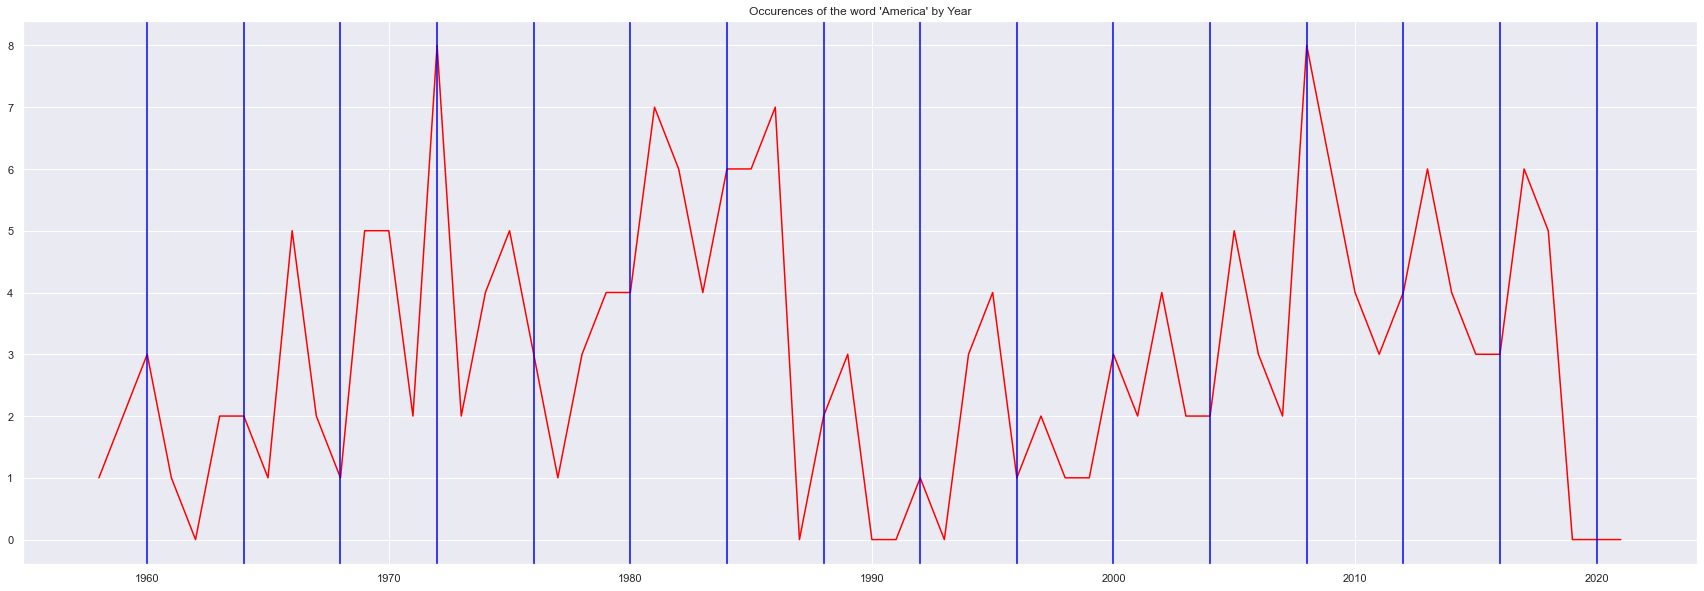

In [45]:
sns.lineplot(x=americanCounts.keys(), y=americanCounts.values()).set(title="Occurences of the word 'America' by Year")
for yr in electionYrs:
    plt.axvline(yr)
sns.set(rc={"figure.figsize": (30,10)}, palette=['b', 'r'])
plt.show()

This graph shows election years (the blue vertical lines) and the amount of unique occurences of the string "America" in songs on the Billboard Hot 100. Unique occurences means that this is the amount of songs that mention America at some point. While there appear to be some major peaks that correspond with presidential election years, there are also some low points that correspond with election years. While I'm unsure of how to statistically analyze this, the graph does not appear to show a significance between election years and the mention of the string 'America'.

I hope to do a few more analyses like this one: a correlation of fequency with other cultural/societal events.

### Questions for reviewer:

- How can I improve my second Analysis? I feel like there is a more concrete way of concluding whether or not there is a correlation.
- Do you have any ideas for other points of society to which I could compare my data?
- Is it okay if part of my data analysis is relatively simple and more frequency based than data modeling?